<a href="https://colab.research.google.com/github/rsudiplive/US-Airline_tweet_sentiment_analysis/blob/main/USAirline_tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing soldiers in the battle!**

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import model_selection, naive_bayes, svm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, accuracy_score,precision_recall_curve,auc,roc_curve,precision_recall_curve

#nlp:
import re, nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from wordcloud import WordCloud,STOPWORDS
# import Tokenizer.
from nltk.tokenize import word_tokenize, sent_tokenize 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
airline_df = pd.read_csv('/content/drive/MyDrive/AB_DS/datasets/Tweets.csv')
airline_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
airline_df.shape

(14640, 15)

In [6]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## **Variables Exploration:**

The dataset contains 14640 no of observations with a total of 15 features. Few of the variables are having null values but we're not going to do any treatment for null values at the moment but we can do it at the later stage either by dropping them or imputing with any measures of central tendency or we can choose the important features for our model and treat them accordingly!

**airline_sentiment** is the target/dependent variables whereas **text** column qualifies as one of the independent variable while training and testing the model.


## **Data Exploration & Pre-processing!**

In [7]:
#no of unique values excluding null values!
airline_df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [8]:
#checking null values in our data
airline_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [9]:
missing_val_count_by_column = airline_df.isnull().sum()/len(airline_df)
#missing value count/cols having max null values
print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

negativereason_gold       0.997814
airline_sentiment_gold    0.997268
tweet_coord               0.930396
dtype: float64


We can remove the above three columns as they contain more than 90% of the missing values and hence won't contribute much to the model.

In [10]:
#dropping null values with a threshold set to 40%
airline_df = airline_df.dropna(thresh=airline_df.shape[0]*0.4,how='all',axis=1)
airline_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [11]:
#checking duplicate records!
print(f"There are {airline_df.duplicated().sum()} duplicate records in the datset.") 

There are 39 duplicate records in the datset.


In [12]:
#removing the duplicates!
airline_df.drop_duplicates(inplace = True)
print(f"There are now {airline_df.duplicated().sum()} duplicate records in the datset.")

There are now 0 duplicate records in the datset.


## **EDA:**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

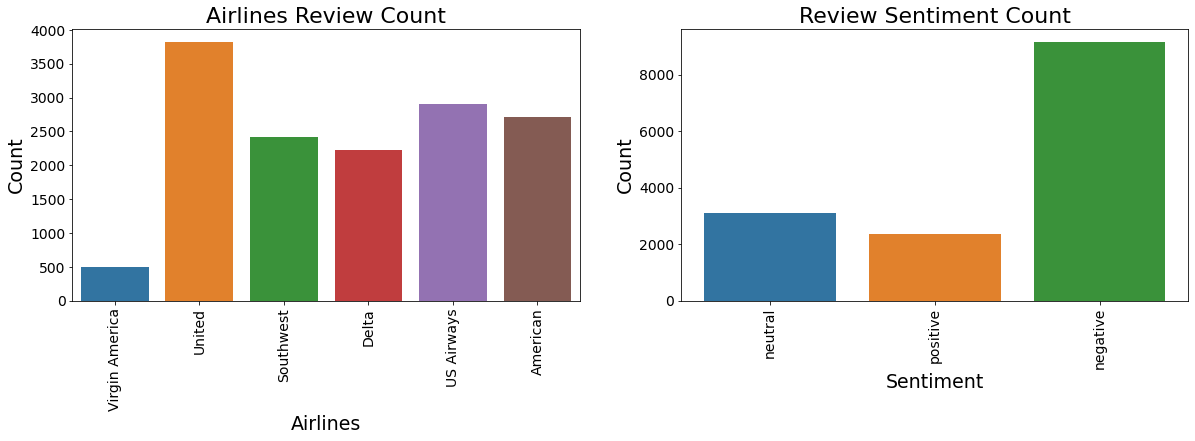

In [13]:
#Visualizing Airline review & sentiments!

figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

plt.subplot(121)
col = "airline"
xlabel = "Airlines"
ylabel = "Count"

sns.countplot(x=airline_df[col])
plt.title("Airlines Review Count")
plt.xticks(rotation=90)
plt.xlabel(xlabel)
plt.ylabel(ylabel)


plt.subplot(122)
col = "airline_sentiment"
xlabel = "Sentiment"
ylabel = "Count"
sns.countplot(airline_df[col])
plt.title("Review Sentiment Count")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

<AxesSubplot:ylabel='airline_sentiment'>

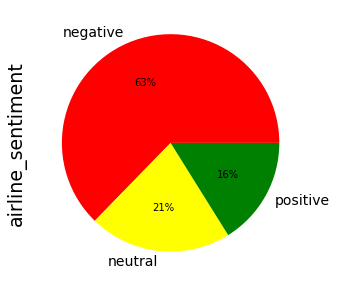

In [14]:
#percentage of Airline sentiments!
airline_df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

**Inferences:**
1. Majority of the reviews are Negative(63%). 
2. United Airlines has the highest count of reviews indicating the most no. of flights. Virgin America has the least.

<AxesSubplot:xlabel='airline'>

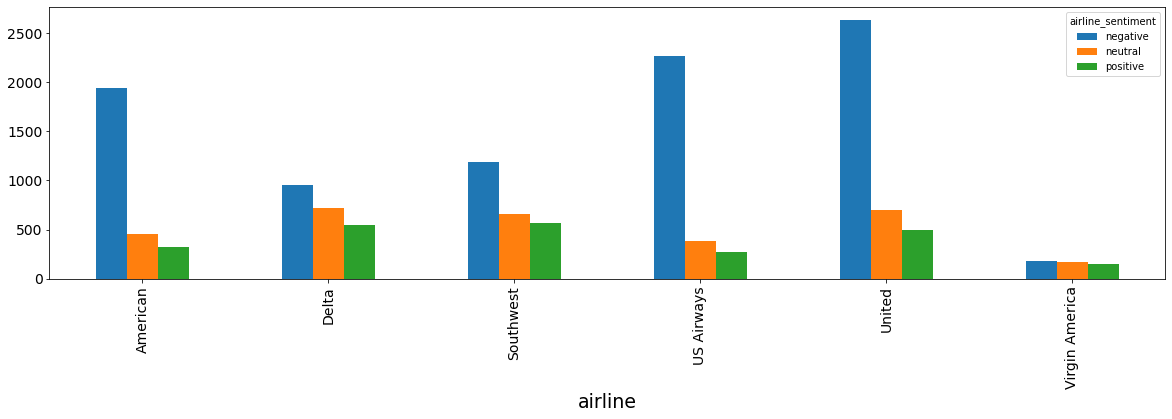

In [15]:
#Distribution of reviews across Airlines!
airline_sentiment_dist = airline_df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment_dist.plot(kind='bar')

**Inferences:**
1. United Airlines accounting to most no of flights also received the highest no of negative reviews.
2. Virging America accounting to least no of flights has the balanced proportion of all the sentiments across.

In [16]:
#creating a copy of the airline dataframe for future work!
airline_df_mod = airline_df.copy()

**Let's now check the reason for the majority of negative sentiments!**

In [17]:
#checking the reason for negative sentiments with a pie plot..
import plotly.graph_objects as go
crosstab_neg_reasons=pd.crosstab(airline_df.airline,airline_df.negativereason)
labels = list(crosstab_neg_reasons.columns)
values = [crosstab_neg_reasons[col_name].sum() for col_name in labels]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title='Overall distribution for negative reasons')
fig.show()

**Inferences:** Most of the negative reasons accounts majorly for either Customer Service Issue and Late flight.

**Now let us find the frequency of the most used words in Positive and Negative tweets!**

In NLP,  **word clouds** can be useful for **visualizing the most common words or phrases** associated with a particular sentiment or topic in a text corpus. For example, in analyzing negative tweet sentiments, we can use a word cloud to display the most commonly used negative words or phrases in the tweets, which can help in identifying patterns and trends in the sentiment of the tweets.

In [18]:
#airline_df[airline_df['airline_sentiment']=='negative'].head()

In [19]:
#checking the uncleaned original version of text in the original df!
neg_sent_df=airline_df[airline_df['airline_sentiment']=='negative']
words = ' '.join(neg_sent_df['text'])
print(words)

@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse @VirginAmerica and it's a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it's been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won't be able 2 eat an

In [20]:
airline_df.apply(lambda row: row.astype(str).str.contains('@').any(), axis=1).sum()

14601

In [21]:
airline_df.apply(lambda row: row.astype(str).str.contains('http').any(), axis=1).sum()

1171

In [22]:
airline_df.apply(lambda row: row.astype(str).str.contains('RT').any(), axis=1).sum()

135

Sometimes people type "RT" at the beginning of a Tweet to indicate that they are re-posting someone else's content.

*WORD CLOUD for negative tweets!*

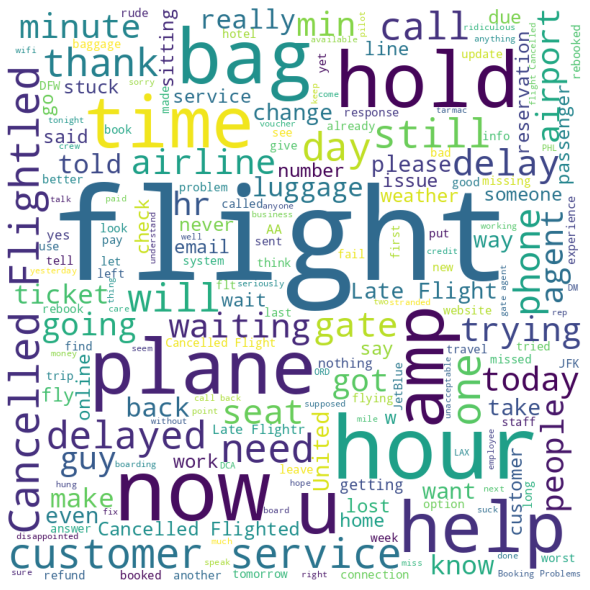

In [23]:
cleaned_word = " ".join([word for word in words.split() if 'http' not in word 
                         and not word.startswith('@') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(cleaned_word)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**cancelled flight, late flight, delay, help, customer service(issues) are the most frequent words in the word cloud for neg tweets.

**Let's now check if there's any relationship between date and negative sentiments owing to each Airlines:**

In [24]:
#airline_df.head()

In [25]:
date_df = airline_df.reset_index()
date_df['tweet_created'] = pd.to_datetime(date_df['tweet_created'])
#getting only the date timestamp instead of time nd others using dt.date()
date_df['tweet_created'] = date_df['tweet_created'].dt.date
#print(date_df['tweet_created'])
day_df = date_df.groupby(['tweet_created','airline','airline_sentiment']).size()
day_df


tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

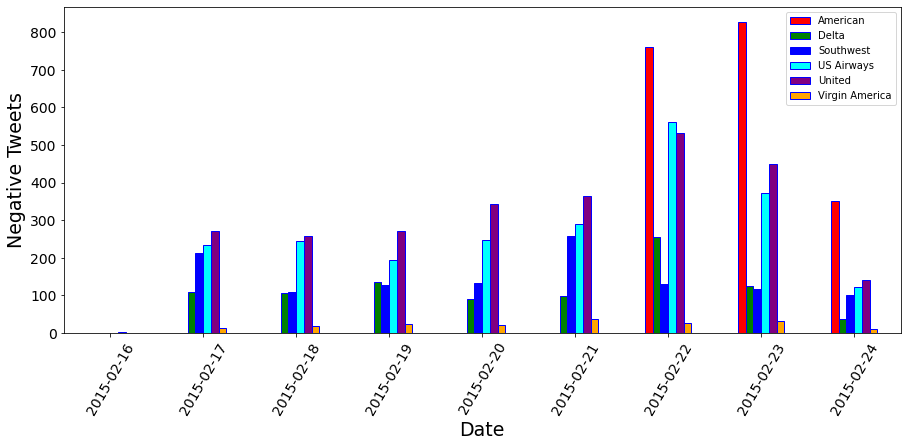

In [26]:
#visualizing date vs (-)ve sentiments of airlines!
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue', 'cyan','purple','orange'], figsize = (15,6), edgecolor='blue', rot = 60)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

**Inferences:** </p>

1) We see from this weekly data, American Airlines constituting the max no of flights also exhibits increase in the negative tweets from 22-02-2015 with its peak at 23-02-2015 and decreased a half at 24-02-2015. </p>

2) United and US Airways showed relative numbers in negative tweets starting from the week, but tends to decrease and could maintain customer satisfaction by week ending.

3) Virgin America, accounting to the least no of flights also exhibited the least negative tweets. 

4) The trend in the distributions of the tweets of each Airlines is slightly skewed. 

*WORD CLOUD for positive tweets!*

let's replace the same code with 'airline_sentiment'=='positive' :

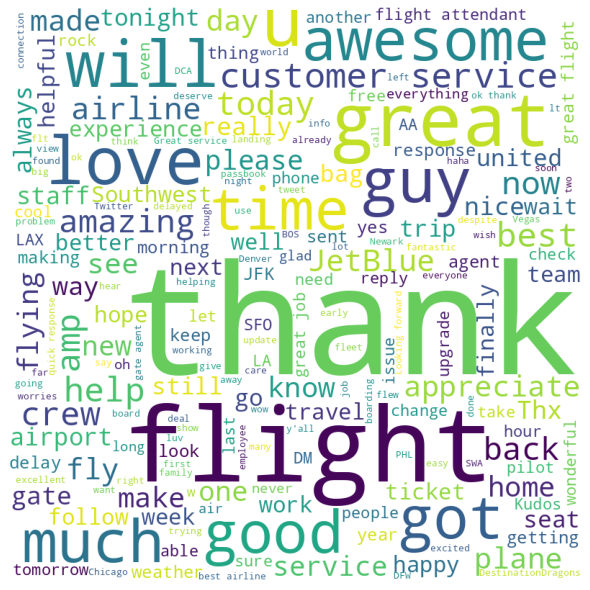

In [27]:
pos_sent_df=airline_df[airline_df['airline_sentiment']=='positive']
words = ' '.join(pos_sent_df['text'])

cleaned_word = " ".join([word for word in words.split() if 'http' not in word 
                         and not word.startswith('@') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(cleaned_word)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**thank, awesome, love, good, great and others constituting the most frequent words indicating customer satisfaction for positive tweets.

## **Text pre-processing & Analysis:**

Here we are supposed to built a classifier that will do Binary classification(1/0). Since the tweet sentiments contain: positive, negetive and neutral, we are okay to drop the neutral sentiment from further analysis and predictions.

In [28]:
#dropping neutral sentiments!
airline_df.drop(airline_df.loc[airline_df['airline_sentiment']=='neutral'].index, inplace=True)
#airline_df.head()

In [29]:
# Remove stop words and punctuation
stop_words = set(stopwords.words('english'))

'''
writing a func for text pre-processing including lowering the letter, 
removing stopwords, punctuations and tokenizing to get a cleaned version 
of the tweets.
'''

def preprocess(text):
    text = text.lower()
    #replacing all punctuation marks with None from translation table
    text = text.translate(str.maketrans('', '', string.punctuation))
    #The [^a-zA-Z] regex pattern matches any character that is not an uppercase 
    #or lowercase letter in the English alphabet. 
    #So, this code replaces all non-letter characters with a space.
    tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

In [30]:
airline_df['airline_sentiment'] = airline_df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)
airline_df['cleaned_tweet'] = airline_df['text'].apply(preprocess)
airline_df.reset_index(drop=True, inplace = True)
#airline_df.head()

In [31]:
#let's have a look at the cleaned pre-processed version of the tweets!
cleaned_words = ' '.join(airline_df['cleaned_tweet'])
print(cleaned_words)

virginamerica plus youve added commercials experience tacky virginamerica really aggressive blast obnoxious entertainment guests faces amp little recourse virginamerica really big bad thing virginamerica seriously would pay flight seats didnt playing really bad thing flying va virginamerica yes nearly every time fly vx ear worm go away virginamerica well didnt virginamerica amazing arrived hour early youre good virginamerica lt pretty graphics much better minimal iconography virginamerica great deal already thinking nd trip australia amp havent even gone st trip yet p virginamerica virginmedia im flying fabulous seductive skies u take stress away travel httptcoahlxhhkiyn virginamerica thanks virginamerica sfopdx schedule still mia virginamerica excited first cross country flight lax mco ive heard nothing great things virgin america daystogo virginamerica flew nyc sfo last week couldnt fully sit seat due two large gentleman either side help flying virginamerica virginamerica know would 

In [32]:
#checking the head of the dataframe:
#airline_df.head()

## **Vectorization for model building and prediction:**

In [33]:
#input text features!
X = airline_df.cleaned_tweet
#output labels!
y = airline_df.airline_sentiment

print(len(X), len(y))

11510 11510


In [34]:
#let us do the famous train-test split ;)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=10)
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

9208 9208
2302 2302


To make statistical algorithms work with text, **we first have to convert text to numbers**. To do so, three main approaches exist i.e. Bag of Words(using count vectorizer), TF-IDF and Word2Vec.

**Let's first use the Bag of Words model and check the model performance:**

In [35]:
# instantiate the vectorizer
vect = CountVectorizer(ngram_range=(1,2), analyzer = 'word')
X_train_bow = vect.fit_transform(X_train)

In [36]:
processed_features_vectors = X_train_bow.toarray()
print(processed_features_vectors)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
#applying CountVectorizer() to the test data
X_test_bow = vect.transform(X_test)

## **Model Building:**

In [38]:
#training SVM model with linear kernel
from sklearn.svm import SVC
model_svm = SVC(kernel='linear', probability=True, random_state = 10)
model_svm.fit(X_train_bow, y_train)
#predicting output for test data
pred = model_svm.predict(X_test_bow)

In [39]:
#accuracy score
accuracy_score(y_test,pred)

0.91876629018245

In [40]:
#some well-known performance metrics:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1776   80]
 [ 107  339]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1856
           1       0.81      0.76      0.78       446

    accuracy                           0.92      2302
   macro avg       0.88      0.86      0.87      2302
weighted avg       0.92      0.92      0.92      2302



The above evaluation metrics scores for accuracy: 92%, Precision, Recall and F1 score, indicates a good model performance using SVM classifier.

In [41]:
# Get the predicted probabilities
train_preds = model_svm.predict_proba(X_train_bow)
test_preds = model_svm.predict_proba(X_test_bow)

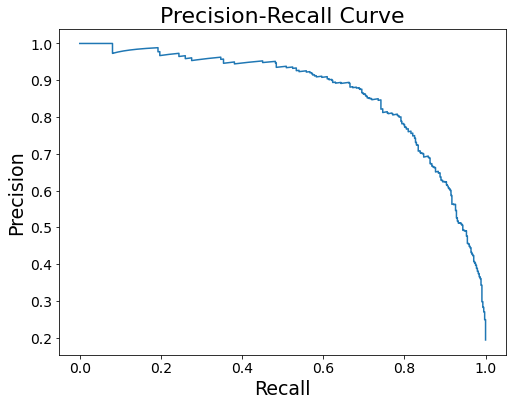

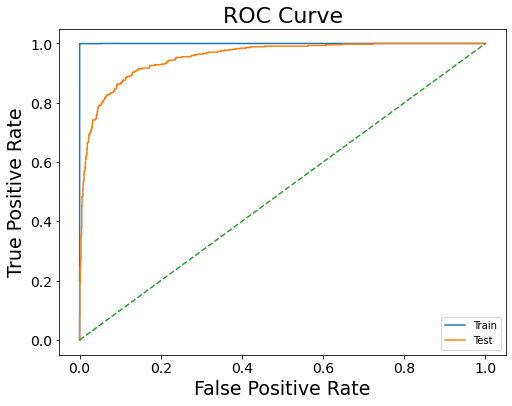

In [42]:
#visualizing auc-roc curves & precision-recall curve:

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_preds[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_preds[:,1])

precision, recall, thresholds = precision_recall_curve(y_test, test_preds[:,1])

# Create the straight line (how the graph looks like if the model does random guess instead)
random_probs = [0 for _ in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

# Plot the precision-recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label='Train')
plt.plot(fpr_test, tpr_test, label='Test')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [43]:
auc_roc = roc_auc_score(y_test, test_preds[:,1])
print('AUC-ROC:', auc_roc)

AUC-ROC: 0.9542811098654708


**Inferences:** </p>

1) With the increase in recall, the precision tends to decrease. So, with the increase in recall, the model may have a higher chance of capturing all the true positives, but at the same time, the number of false positives also increases. As a result, the precision may decrease, indicating that the model is becoming more lenient in classifying samples as positive. This trade-off is visualized in the above curve.

2)The AUC-ROC value closer to 1 indicating a very good model.

## **Cross-Validation & Hyperparameter tuning!**

In [45]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}

# Define the SVM model
svm = SVC(probability=True)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data and evaluate the best model on the testing data
grid_search.fit(X_train_bow, y_train)
y_pred = grid_search.predict(X_test_bow)
optimal_model = grid_search.best_estimator_

print('Best parameters are:', grid_search.best_params_)

Best parameters are: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


**Let's find out the metrics scores for the optimal svm model:**

In [46]:
# Making predictions on train and test data
train_class_preds = optimal_model.predict(X_train_bow)
test_class_preds = optimal_model.predict(X_test_bow)
# Get the probabilities on train and test
train_preds = optimal_model.predict_proba(X_train_bow)[:,1]
test_preds = optimal_model.predict_proba(X_test_bow)[:,1]

In [47]:
test_class_preds

array([1, 0, 0, ..., 0, 0, 0])

In [48]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9996741963509991
The accuracy on test dataset is 0.91876629018245


In [49]:
# Get the roc_auc score for train and test dataset
train_auc = roc_auc_score(y_train,train_preds)
print("The ROC-AUC score on train dataset is", train_auc)
test_auc = roc_auc_score(y_test,test_preds)
print("The ROC-AUC score on test dataset is", test_auc)

The ROC-AUC score on train dataset is 0.9999710551032546
The ROC-AUC score on test dataset is 0.9542811098654709


**Inferences:**</p>

With the best set of hyper-parameters for our optimal SVM model using cross-validation, we're getting good accuracy and roc-auc scores close to 1 across both training and testing sets, hence qualifying to be good model.


## **Let us try other methods & models such as Decision Tree, Random Forest, XGBoost to test the performance:**

**We'll also try to use the pipeline method to train three models (Decision Tree, Random Forest, and XGBoost) using the preprocessing steps with CountVectorizer and added TfidfTransformer**. Then we'll evaluate their performance on the same testing set. 

**The purpose of using a pipeline here is to define a sequence of steps that are applied to the data**

**Note:**

CountVectorizer() and TfidfTransformer() will run one after the other in the pipeline. **The CountVectorizer() first transforms the text data into a matrix of token counts and then TfidfTransformer() takes this count matrix as input and transforms it into a normalized tf-idf representation**.The normalized tf-idf matrix is then fed into the model for training & prediction.

This pipeline ensures that both steps are performed consistently across the training and testing sets.

In [50]:
from sklearn.pipeline import Pipeline

**TfidfVectorizer is a combination of two steps**: first, it tokenizes the raw text data and constructs a vocabulary of unique words in the corpus, and second, it calculates the tf-idf representation of each document in the corpus using TfidfTransformer. In other words, TfidfVectorizer performs both the count-based and normalization steps in a single step.

**TfidfTransformer**, on the other hand, takes a count matrix as input like **the one outputted by CountVectorizer** and then normalizes it into a tf-idf representation. 

Here we'll use the **TfidfTransformer** to work in the pipeline, since we already have the pre-processed text data and have a count matrix as input from using **CountVectorizer**. Hence, we should use the TfidfTransformer in the pipeline **to normalize the count matrix into a tf-idf representation.**

### ***Defining a pipeline for the Decision Tree model:***

In [51]:
dt_pipeline = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', DecisionTreeClassifier())])

# Train and evaluate the Decision Tree model
dt_pipeline.fit(X_train, y_train)
y_pred_dt = dt_pipeline.predict(X_test)
print('Decision Tree Model:')
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Decision Tree Model:
Accuracy: 0.91876629018245
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1856
           1       0.81      0.76      0.78       446

    accuracy                           0.92      2302
   macro avg       0.88      0.86      0.87      2302
weighted avg       0.92      0.92      0.92      2302



### ***Defining a pipeline for the Random Forest model:***

In [52]:
rf_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier())
])

# Train and evaluate the Random Forest model
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)
print('Random Forest Model:')
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Random Forest Model:
Accuracy: 0.9061685490877498
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1856
           1       0.83      0.64      0.73       446

    accuracy                           0.91      2302
   macro avg       0.88      0.81      0.83      2302
weighted avg       0.90      0.91      0.90      2302



Let us try out some **hyperparameter tuning and cross-validation on the random forest model** and then find out the best parameters/optimal model!

In [53]:
# Number of trees
n_estimators = [100,200,300,400]

# Maximum depth of trees
max_depth = [5, 10, 15, 20]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]

# HYperparameter Grid
param_dict = {'clf__n_estimators' : n_estimators,
              'clf__max_depth' : max_depth,
              'clf__min_samples_split' : min_samples_split,
              'clf__min_samples_leaf' : min_samples_leaf}

***Defining a pipeline for the random forest model with cross-validation:***

In [54]:
pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier())])

# Set up GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(pipeline, param_dict, cv=3, n_jobs=-1)

# Train and evaluate the model with hyperparameter tuning
grid_search_rf.fit(X_train, y_train)
y_pred = grid_search_rf.predict(X_test)
print(f"Best parameters: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Best parameters: {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Accuracy: 0.8084274543874891
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1856
           1       1.00      0.01      0.02       446

    accuracy                           0.81      2302
   macro avg       0.90      0.51      0.46      2302
weighted avg       0.85      0.81      0.72      2302



When we ran a simple RF model, the accuracy is 91% as compared to 81% while performing GridsearchCV/cross-validation, that can majorly happen due to several reasons like the quality of data being accessed while training & fitting a simple RF model might be better and simple as compared to the grid search implementation. 

Also, the Hyperparameters such as the number of trees, depth of trees, and number of features considered at each split can have a significant impact on the accuracy of a random forest model.The hyperparameters of the random forest model used in the simple implementation may be better suited to the data than the GridSearch. 

### ***Defining a pipeline for the XGBoost model:*** 

Similarly,

In [55]:
xgb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', XGBClassifier())
])

# Train and evaluate the XGBoost model
xgb_pipeline.fit(X_train, y_train)
y_pred = xgb_pipeline.predict(X_test)
print('XGBoost Model:')
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

XGBoost Model:
Accuracy: 0.9052997393570807
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1856
           1       0.80      0.67      0.73       446

    accuracy                           0.91      2302
   macro avg       0.86      0.82      0.84      2302
weighted avg       0.90      0.91      0.90      2302



In this problem statement, I leveraged the power of natural language processing (NLP) to explore and analyze tweets about major US airlines. Specifically, I used feature engineering and text-preprocessing techniques to prepare the data for analysis and then implemented several baseline models to test their performance on predicting tweet sentiment.

While the project is comprehensive in its scope, there is always more to be done in the world of NLP and data analysis.

Thank you for taking the time to explore my work, and I hope that it inspires you to delve deeper into the exciting world of NLP and data analysis!

In [ ]:
#This notebook is contributed by Sudip Roy :)